# Module 4 Project : datafun-04-Jupyter
Title : Specification for Project 4 Jupyter Notebook

Anjana Dhakal, May 20, 2024

Purpose: Project 4 uses a combination of Python and Markdown to create an initial data story in a Jupyter Notebook. The project includes a project virtual environment with popular libraries for data analytics including pandas, matplotlib, and seaborn, and introduces a common process for starting exploratory data analysis projects. 

Objective:
Develop a Jupyter Notebook that demonstrates skills with Jupyter and guided exploratory data analysis.



## Import Dependencies

In [14]:
#importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Load the Iris Dataset into Dataframe


In [15]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Initial Data Inspection
Display the first 10 rows of the DataFrame, check the shape, and display the data types of each column using df.head(10), df.shape, and df.dtypes.

In [16]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Initial Descriptive Statistics
Use the DataFrame describe() method to display summary statistics for each column.

In [17]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Initial Data Distribution for Numerical Columns
Choose a numerical column and use df['column_name'].hist() to plot a histogram for that specific column. To show all the histograms for all numerical columns, use df.hist().

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

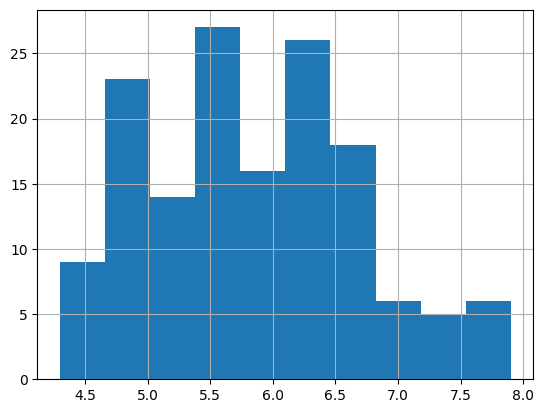

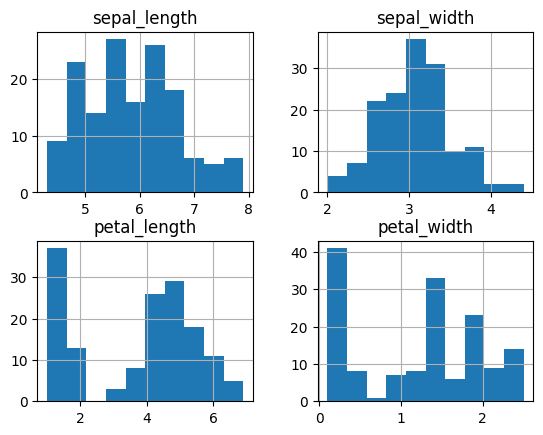

In [18]:
# Inspect histogram by numerical column
df['sepal_length'].hist()

# Inspect histograms for all numerical columns
df.hist()



Result: The histograms reveal that the measurements of sepal length, sepal width, petal length, and petal width in the Iris dataset exhibit distinct patterns, with notable peaks and variations that suggest differences among the species.

## Initial Data Distribution for Categorical Columns

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


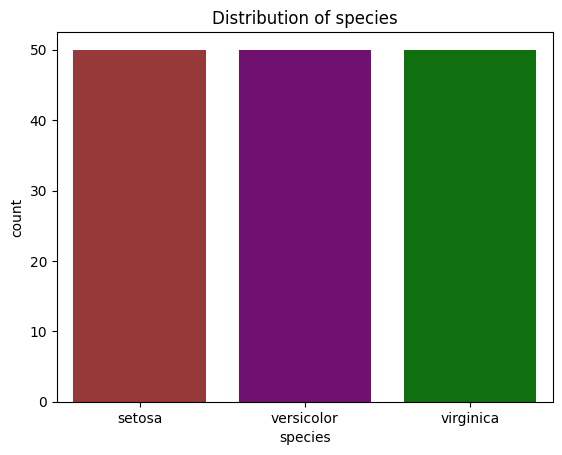

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Define custom colors for each species
custom_palette = {'setosa': 'brown', 'versicolor': 'purple', 'virginica': 'green'}

# Inspect value counts by categorical column
print(df['species'].value_counts())

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, hue='species', data=df, palette=custom_palette)
    plt.title(f'Distribution of {col}')
   
    

Result: The data above shows an even frequency of each species represented in the data set.

## Data Transformation and Feature Engineering
Use pandas and other tools to perform transformations as needed. Transformation may include renaming columns, adding new columns, or transforming existing data for more in-depth analysis.

In [20]:
# Renaming a column
df.rename(columns={'species': 'plant_Species'}, inplace=True)

# Adding a new column
df['petal_length_in'] = df['petal_length'] / 2.54
df['petal_width_in'] = df['petal_width'] / 2.54

#print the head and new column values
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width plant_Species  \
0           5.1          3.5           1.4          0.2        setosa   
1           4.9          3.0           1.4          0.2        setosa   
2           4.7          3.2           1.3          0.2        setosa   
3           4.6          3.1           1.5          0.2        setosa   
4           5.0          3.6           1.4          0.2        setosa   

   petal_length_in  petal_width_in  
0         0.551181         0.07874  
1         0.551181         0.07874  
2         0.511811         0.07874  
3         0.590551         0.07874  
4         0.551181         0.07874  


## Initial Visualizations
Creating a Pairplot to identify trends from the Iris Dataset Species.

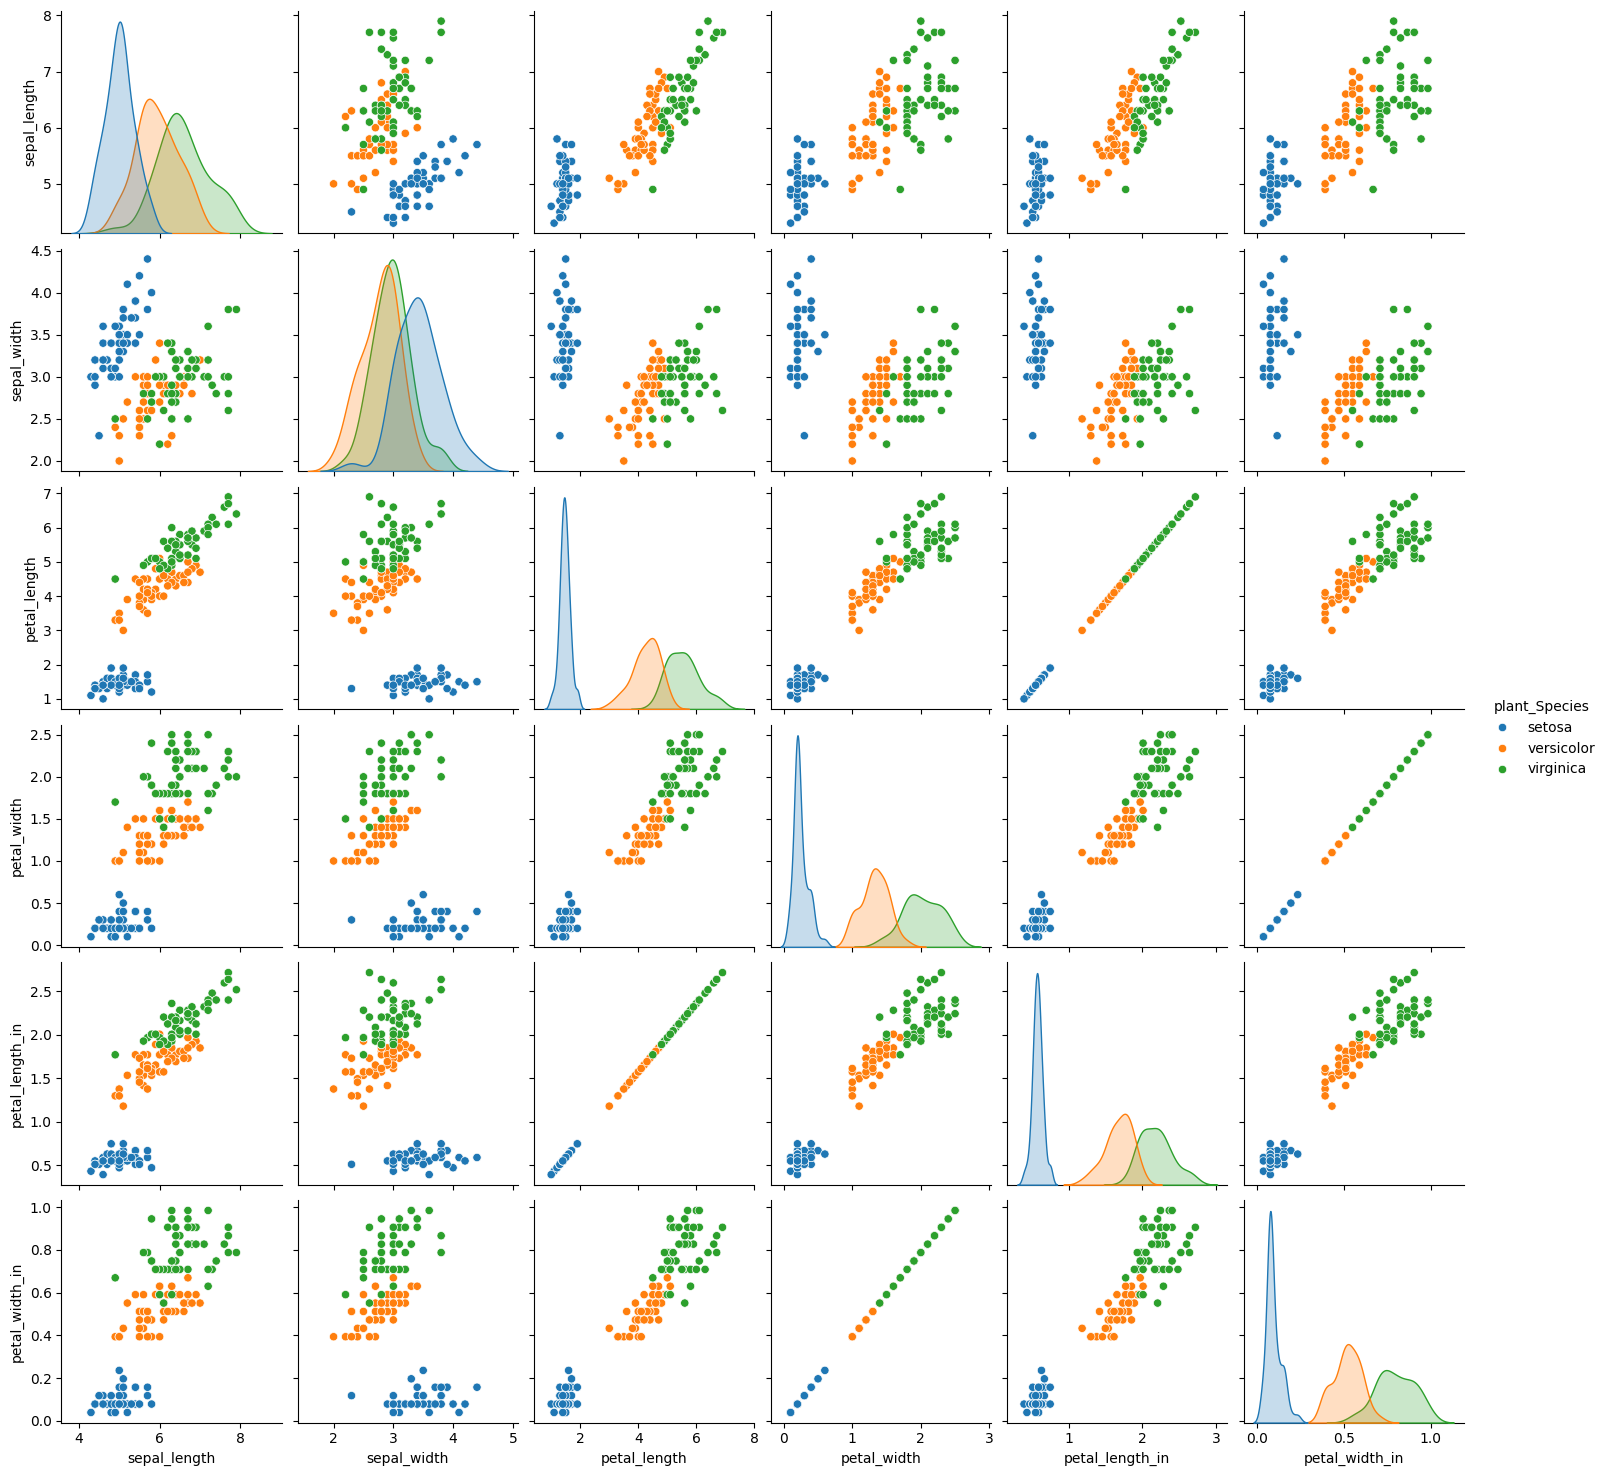

In [21]:
def plot_pairplot(df):
    """Plot pairplot with the new named columns."""
    sns.pairplot(df, hue="plant_Species")
    #plt.show()

# Plot pairplot
plot_pairplot(df)


## Creating scatterplot to represent species treds:
This creates a scatter plot where the x value is the petal lenght, the y value is petal width and the hue or key is the plant_Species and pallete is used to choose color for different pant species. The code then modifies the x and y axis labels and the title of the plot. Data is shown in inches.

Text(0.5, 1.0, 'Petal Length vs. Petal Width')

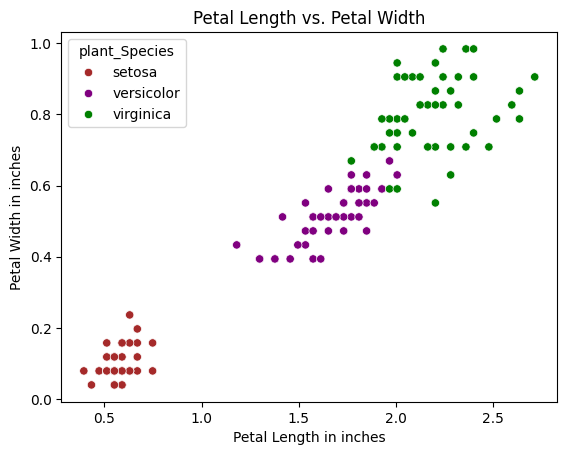

In [22]:

plt = sns.scatterplot(data=df, x="petal_length_in", y="petal_width_in", hue="plant_Species", palette = {'setosa': 'brown', 'versicolor': 'purple', 'virginica': 'green'})

# Set axis labels and chart title
plt.set_xlabel("Petal Length in inches")
plt.set_ylabel("Petal Width in inches")
plt.set_title("Petal Length vs. Petal Width")

# Show the plot (This actually causes an error)
#plt.show()

Result: The scatter plot clearly shows distinct clusters for each of the three iris species:
1. The brown color represents the Setosa species, which forms a distinct cluster with smaller petal lengths and widths.
2. The purple color represents the Versicolor species, which has intermediate petal lengths and widths.
3. The green color represents the Virginica species, which has larger petal lengths and widths.